# DSCI 100 Project: Predicting Minecraft Player Subscription 
Andrew Ip

In [1]:
# Run this cell before continuing.

library(tidyverse)
library(tidymodels)
library(repr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## Introduction

**Background:** 
provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report

**Question:** 

*Can the players' ages and hours played be used to predict whether they have a game newsletter subscription in the Minecraft server data?*

**Data Description:** identify and fully describe the dataset that was used to answer the question. Provide a full descriptive summary of the dataset, including information such as the number of observations, summary statistics, number of variables, name and type of variables, what the variables mean, any issues you see in the data, any other potential issues related to things you cannot directly see, how the data were collected, etc. Make sure to use bullet point lists or tables to summarize the variables in an easy-to-understand format. Note that the selected dataset(s) will probably contain more variables than you need. 

## Methods and Results

First, load the data set using a URL to the file stored in the GitHub repository. The `players.csv` file will be used for analysis.

In [2]:
url <- "https://raw.githubusercontent.com/andrew11i/AI-dsci-100-project-2025ss/refs/heads/main/players.csv"

players <- read_csv(url)
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [3]:
distinct(players, subscribe)

subscribe
<lgl>
TRUE
FALSE


In [4]:
players_clean <- players |>
  mutate(subscribe = as_factor(subscribe)) |>
  mutate(subscribe = fct_recode(subscribe, "Subscribed" = "TRUE", "Not Subscribed" = "FALSE")) 
head(players_clean)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,Subscribed,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,Subscribed,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,Not Subscribed,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,Subscribed,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,Subscribed,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,Subscribed,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


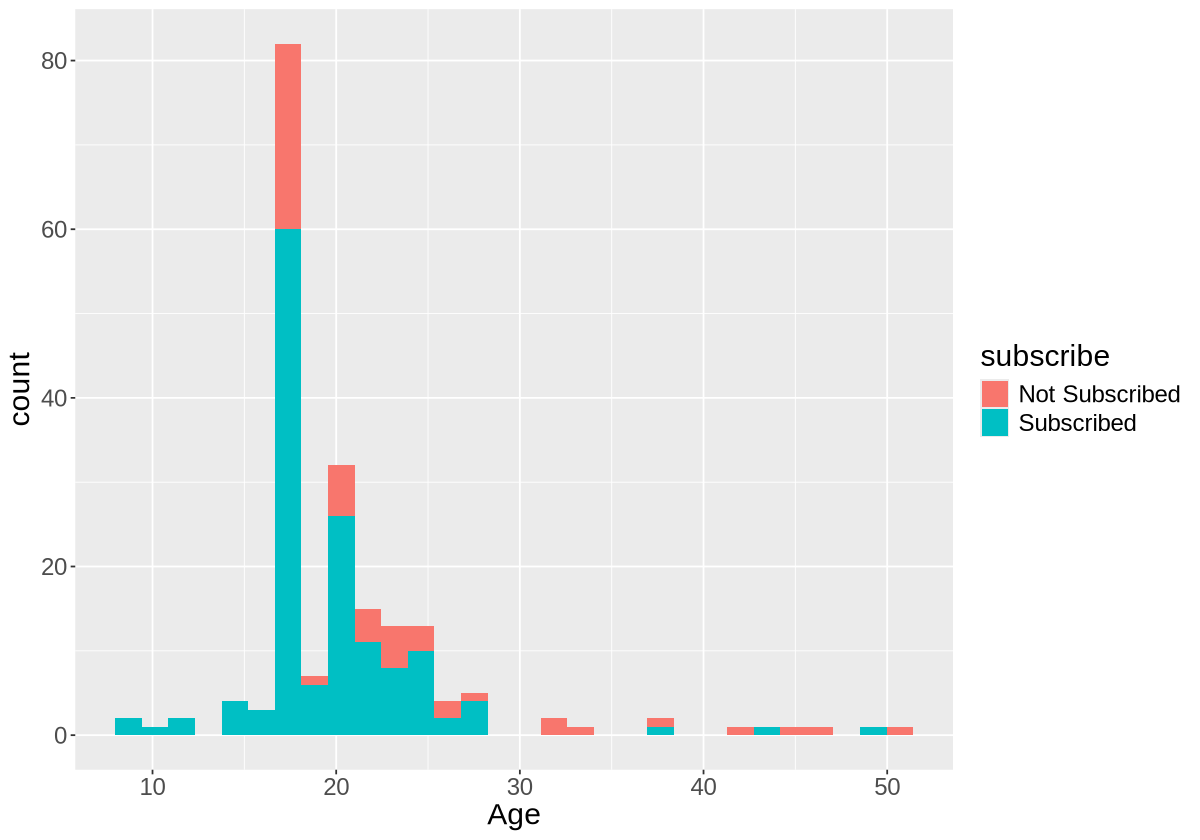

In [5]:
options(repr.plot.width = 10)
ggplot(players_clean, aes(x = Age, fill = subscribe)) +
  geom_histogram() +
  theme(text = element_text(size = 18))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


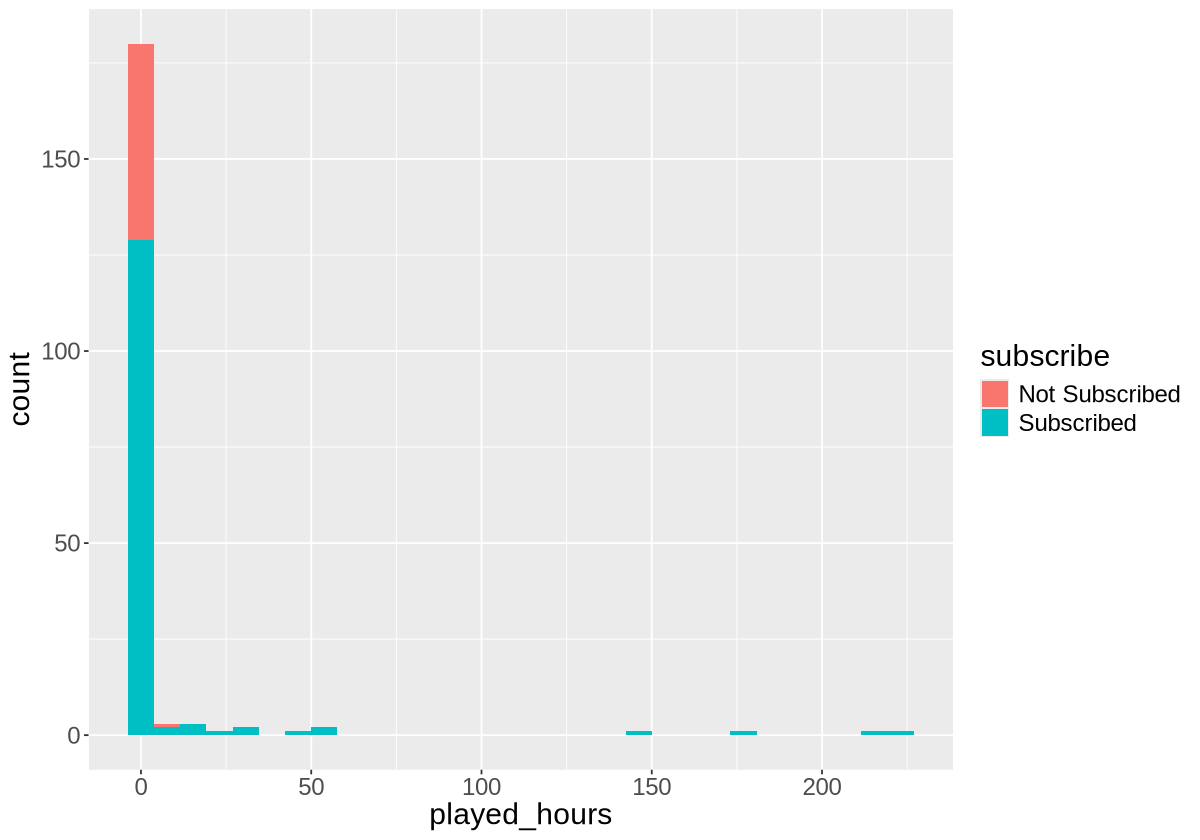

In [6]:
ggplot(players_clean, aes(x = played_hours, fill = subscribe)) +
  geom_histogram() +
  theme(text = element_text(size = 18))

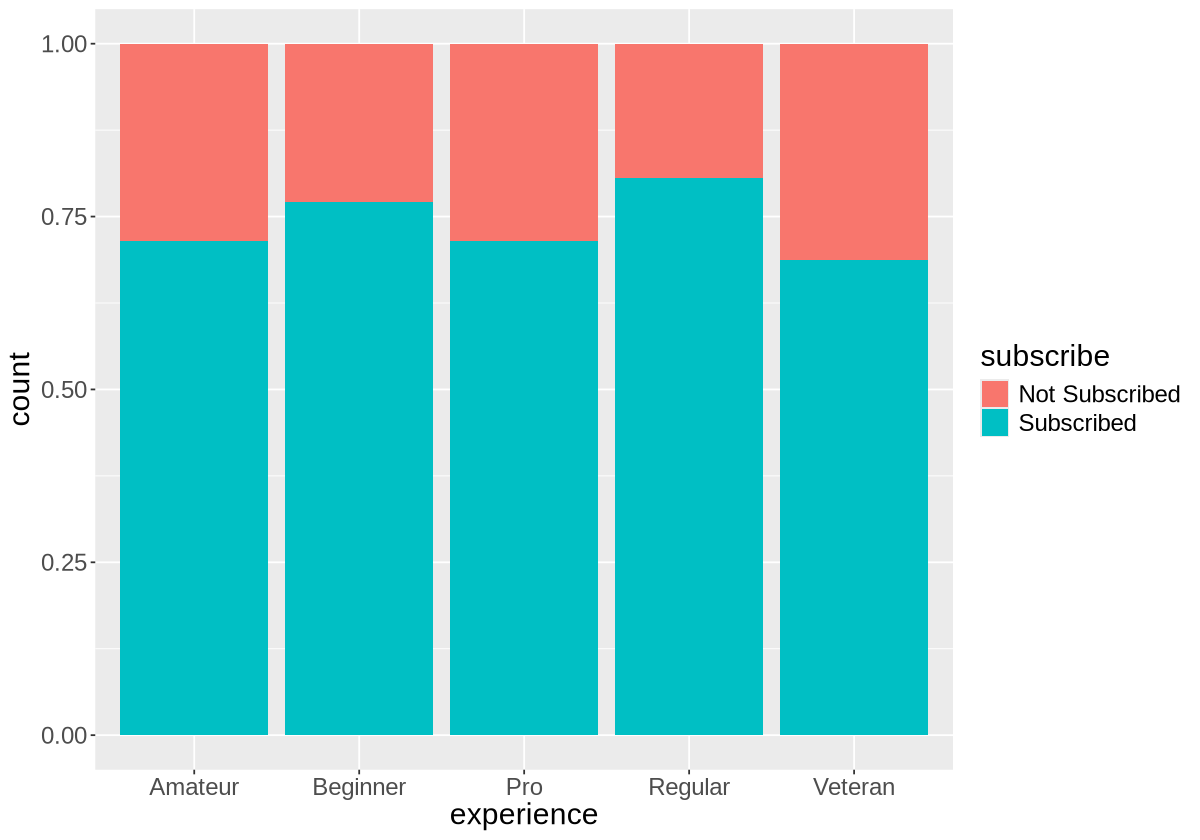

In [7]:
ggplot(players_clean, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "fill") +
  theme(text = element_text(size = 18))

In [9]:
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
  set_engine("kknn") |>
  set_mode("classification")

players_all_recipe <- recipe(subscribe ~ Age + played_hours, data = players_clean) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors()) 

players_all_fit <- workflow() |>
  add_recipe(players_all_recipe) |>
  add_model(players_spec) |>
  fit(data = players_clean)

In [10]:
new_obs <- tibble(Age = 20, played_hours = 150)

predict(players_all_fit, new_obs)

.pred_class
<fct>
Subscribed


Next, let's evaluate our model.

In [13]:
players_split <- initial_split(players_clean, prop = 0.75, strata = subscribe)

players_train <- training(players_split)

players_test <- testing(players_split)

In [19]:
train_recipe <- recipe(subscribe ~ Age + played_hours, data = players_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

train_fit <- workflow() |>
  add_recipe(train_recipe) |>
  add_model(players_spec) |>
  fit(data = players_train)

players_test_predictions <- predict(train_fit, players_test) |>
  bind_cols(players_test)

head(players_test_predictions)

.pred_class,experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Subscribed,Pro,Subscribed,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Subscribed,Amateur,Subscribed,3caa832978e0596779f4ee7c686c4592fb6de893925025d25bf26be9a8cd03f5,0.2,Thatcher,Male,22
Subscribed,Amateur,Not Subscribed,2313a06afe47eacc28ff55adf6f072e7d12b0d12d7cbae29656f9029ec72bb53,0.0,Quinlan,Male,22
Subscribed,Amateur,Subscribed,a175d4741dc84e6baf77901f6e8e0a06f54809a34e6b5211159bced346f7fb3e,48.4,Xander,Female,17
Not Subscribed,Beginner,Subscribed,89c8e07d6a2aa102d9cd05086d51b2e41195c9c807dd976a06f4262ff36d0cca,0.0,Ren,Male,17
Subscribed,Amateur,Subscribed,119f01b9877fc5ea0073d05602a353b91c4b48e4cf02f42bb8d661b46a34b760,0.7,Hugo,Female,21


In [21]:
players_test_predictions |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5714286


Let's now use cross-validation to find the best K value.

In [39]:
players_vfold <- vfold_cv(players_train, v = 5, strata = subscribe) 

tune_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification") 

players_grid <- tibble(neighbors = seq(from = 1, to = 15, by = 1))

tune_results <- workflow() |>
  add_recipe(train_recipe) |>
  add_model(tune_spec) |>
  tune_grid(resamples = players_vfold, grid = players_grid) |>
  collect_metrics() |>
  filter(.metric == "accuracy") 

tune_results

→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 29 rows.
               ✖ Assigned data has 30 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 30 to size 29.

There were issues with some computations   A: x1

→ B | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 27 rows.
               ✖ Assigned data has 28 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 28 to size 27.

There were issues with some computations   A: x1
There were issues with some computations   A: x1   B: x1





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5406130,3,0.06414278,Preprocessor1_Model01
2,accuracy,binary,0.5517241,3,0.05518838,Preprocessor1_Model02
3,accuracy,binary,0.5839080,3,0.01609195,Preprocessor1_Model03
4,accuracy,binary,0.5283525,3,0.04951135,Preprocessor1_Model04
5,accuracy,binary,0.6176245,3,0.01570881,Preprocessor1_Model05
6,accuracy,binary,0.5954023,3,0.01978659,Preprocessor1_Model06
7,accuracy,binary,0.6509579,3,0.07473425,Preprocessor1_Model07
8,accuracy,binary,0.6731801,3,0.08017556,Preprocessor1_Model08
9,accuracy,binary,0.7072797,3,0.04647874,Preprocessor1_Model09


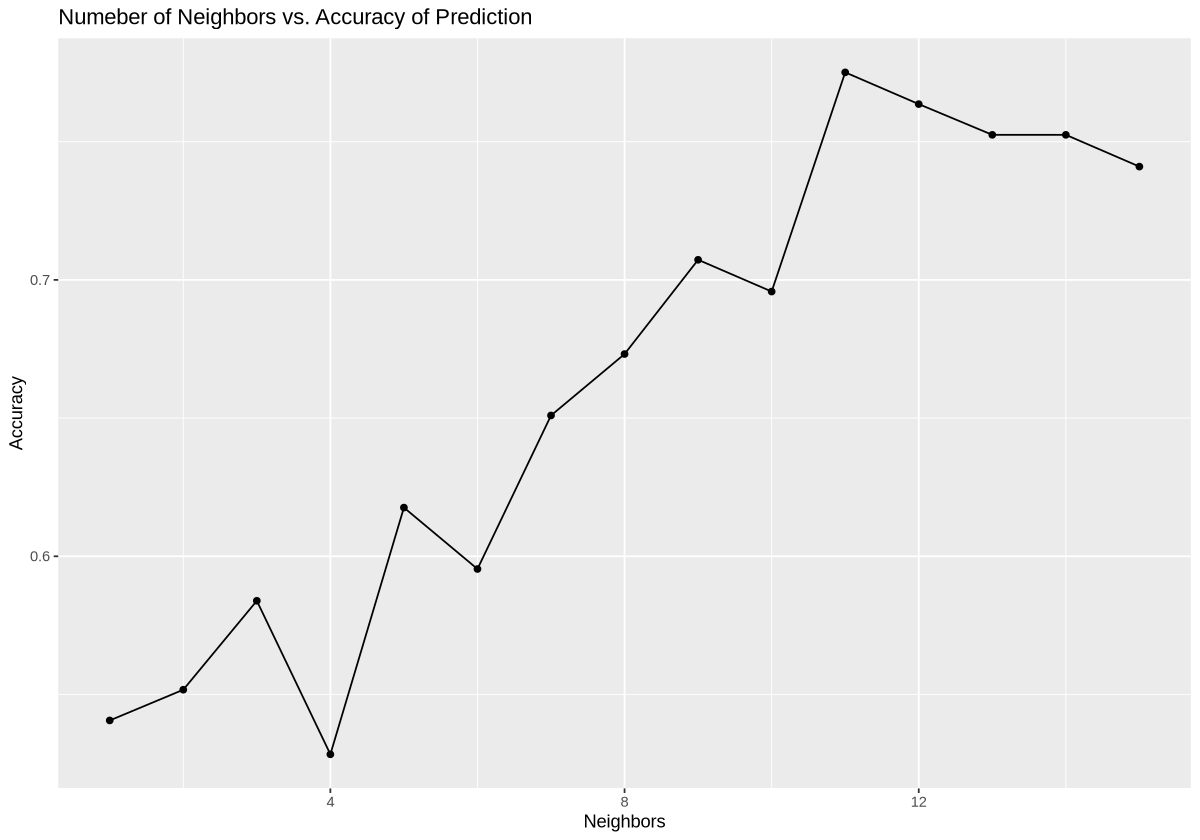

In [41]:
ggplot(tune_results, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy") +
  ggtitle("Numeber of Neighbors vs. Accuracy of Prediction")

In [42]:
best_k <- tune_results |>
  arrange(desc(mean)) |>
  slice(1) |>
  pull(neighbors)

best_k

[1] 11

In [37]:
best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
  set_engine("kknn") |>
  set_mode("classification") 

train_best_fit <- workflow() |>
  add_recipe(train_recipe) |>
  add_model(best_spec) |>
  fit(data = players_train)

players_test_predictions <- predict(train_best_fit, players_test) |>
  bind_cols(players_test)

players_test_predictions

.pred_class,experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Subscribed,Pro,Subscribed,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Subscribed,Amateur,Subscribed,3caa832978e0596779f4ee7c686c4592fb6de893925025d25bf26be9a8cd03f5,0.2,Thatcher,Male,22
Subscribed,Amateur,Not Subscribed,2313a06afe47eacc28ff55adf6f072e7d12b0d12d7cbae29656f9029ec72bb53,0.0,Quinlan,Male,22
Subscribed,Amateur,Subscribed,a175d4741dc84e6baf77901f6e8e0a06f54809a34e6b5211159bced346f7fb3e,48.4,Xander,Female,17
Subscribed,Beginner,Subscribed,89c8e07d6a2aa102d9cd05086d51b2e41195c9c807dd976a06f4262ff36d0cca,0.0,Ren,Male,17
Subscribed,Amateur,Subscribed,119f01b9877fc5ea0073d05602a353b91c4b48e4cf02f42bb8d661b46a34b760,0.7,Hugo,Female,21
Subscribed,Regular,Subscribed,5baba1651a0b92788bc0d6dcdf00be64af1cf9f0015bbeed204ddabd1d872e83,0.6,Kendall,Female,28
Subscribed,Amateur,Subscribed,4b01bce3f141289709e8278b02ba5d2aaa7105d7ccb9c7deb37670a80e332774,1.8,Luca,Male,23
Subscribed,Amateur,Subscribed,1683a3e0aed65119f83540274ff6f965fdf66890613a80f88572dfb1d9f1d2ad,0.0,Farid,Male,17


In [38]:
confusion_matrix <- players_test_predictions |>
  conf_mat(truth = subscribe, estimate = .pred_class)

confusion_matrix

                Truth
Prediction       Not Subscribed Subscribed
  Not Subscribed              0          0
  Subscribed                 13         36

## Discussion

summarize what you found 

discuss whether this is what you expected to find?

discuss what impact could such findings have?

discuss what future questions could this lead to?